# Introduction to Bedrock - Building with Bedrock Embeddings

In this demo notebook, we demonstrate how to use the Bedrock Python SDK for Embeddings Generation.

1. [Set Up](#1.-Set-Up)
2. [Embeddings Generation](#2.-Embeddings-Generation)
3. [Semantic Similarity](#3.-Semantic-Similarity)

Note: This notebook was tested in Amazon SageMaker Studio with Python 3 (Data Science 2.0) kernel.

### 1. Set Up

---
Before executing the notebook for the first time, execute this cell to add bedrock extensions to the Python boto3 SDK

---

Install the aws CLI from the folder.

In [7]:

%pip install --upgrade pip
!python3 -m pip install bedrock-python-sdk/boto3-1.26.142-py3-none-any.whl --force-reinstall
!python3 -m pip install bedrock-python-sdk/botocore-1.29.142-py3-none-any.whl --force-reinstall

Note: you may need to restart the kernel to use updated packages.
Processing c:\users\majid.kamyab\desktop\git_repos\openai-cookbook\bedrock-python-sdk\boto3-1.26.142-py3-none-any.whl
  Using cached s3transfer-0.6.1-py3-none-any.whl (79 kB)
  Using cached botocore-1.29.165-py3-none-any.whl (11.0 MB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached urllib3-1.26.16-py2.py3-none-any.whl (143 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.16
    Uninstalling urllib3-1.26.16:
      Successfully uninstalled urllib3-1.26.16
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: jmespath
    Found existing installation: jmespath 1.0.1
    Uninstalling jmespath-1.0.1:
      Successfully uninstalled jmespath-1.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Majid.Kamyab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Processing c:\users\majid.kamyab\desktop\git_repos\openai-cookbook\bedrock-python-sdk\botocore-1.29.142-py3-none-any.whl
  Using cached urllib3-1.26.16-py2.py3-none-any.whl (143 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.16
    Uninstalling urllib3-1.26.16:
      Successfully uninstalled urllib3-1.26.16
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: jmespath
    Found existing installation: jmespath 1.0.1
    Uninstalling jmespath-1.0.1:
      Successfully uninstalled jmespath-1.0.1
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dat


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Majid.Kamyab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Let's initialize the boto3 client to use Bedrock

In [1]:
import boto3
import json
session = boto3.Session(profile_name='sandbox')
bedrock = session.client(
 service_name='bedrock',
 region_name='us-east-1' 
)

Lets test the endpoint to see what models are available

### 2. Embeddings Generation

Embeddings are a key concept in generative AI and machine learning in general. An embedding is a representation of an object (like a word, image, video, etc.) in a vector space. Typically, semantically similar objects will have embeddings that are close together in the vector space. These are very powerful for use-cases like semantic search, recommendations and Classifications.

In [40]:
# We will be using the Titan Embeddings Model to generate our Embeddings.

def get_embedding(body, modelId, accept, contentType):
    response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
    response_body = json.loads(response.get('body').read())
    return response_body
body = json.dumps({"inputText":"""give me a unit test for this function     def __init__(\n        self,\n        source_df: DataFrame,\n        spark_context: SparkSession,\n        config_path: str,\n        file_name: str,\n        src_system: str,\n    ) -> None:\n        \"\"\"\n        Initializes the DataCheck class.\n\n        Args:\n            source_df (DataFrame): The source DataFrame to be checked.\n            spark_context (SparkSession): The SparkSession object.\n            config_path (str): The path to the configuration file.\n            file_name (str): The name of the file to be checked.\n            src_system (str): The source system identifier.\n\n        Attributes:\n            spark (SparkSession): The SparkSession object.\n            source_df (DataFrame): The source DataFrame to be checked.\n            error_df (DataFrame): The DataFrame containing errors.\n            error_columns (List[str]): The list of error columns.\n            error_counter (int): The error counter.\n            schema_dict (Dict[str, type]): The dictionary of schema types.\n            s3_client (boto3.client): The S3 client object.\n            s3_resource (boto3.resource): The S3 resource object.\n            config (Dict): The configuration dictionary.\n            rule_df (pd.DataFrame): The DataFrame containing data quality rules.\n            file_name (str): The name of the file to be checked.\n            input_columns (List[str]): The list of input columns.\n            output_columns (str): The output columns.\n            sns_message (List[str]): The list of SNS messages.\n        \"\"\"\n        self.spark = spark_context\n        self.source_df = source_df\n        self.error_df = None\n        self.error_columns = []\n        self.error_counter = 0\n        self.schema_dict = {\n            \"StringType\": StringType,\n            \"DateType\": DateType,\n            \"IntegerType\": IntegerType,\n            \"FloatType\": FloatType,\n            \"DoubleType\": DoubleType,\n        }\n        self.s3_client = boto3.client(\"s3\")\n        self.s3_resource = boto3.resource(\"s3\")\n\n        # Initial configuration\n        config_content = self.read_s3_file(config_path).decode()\n        self.config = self.resolve_config(config_path.replace(\"config.json\", \"env.json\"), json.loads(config_content))\n\n        dq_rule_path = self.config[src_system][\"dq_rule_path\"]\n        # dq_rule_content = self.read_s3_file(dq_rule_path)\n        self.rule_df = pd.read_csv(dq_rule_path, index_col=\"column_name\")\n        self.file_name = file_name\n        self.rule_df = self.rule_df[(self.rule_df[\"file_name\"] == self.file_name)]\n        self.rule_df = self.rule_df.applymap(lambda x: x if x else np.nan)\n        self.rule_df.sort_index(inplace=True)\n        self.sns_message = []\n        \n        self.input_columns = self.source_df.columns\n        try:\n            self.output_columns = self.config[src_system][\"sources\"][self.file_name][\"dq_output_columns\"]\n        except:\n            self.output_columns= 'Patient Number'\n        for index in range(len(self.input_columns)):\n            if \".\" in self.input_columns[index]:\n                self.input_columns[index] = \"`\" + self.input_columns[index] + \"`\"\n\n        missed_columns = set(self.input_columns) - set(self.rule_df.index)\n        if len(missed_columns) > 0:\n            logger.warning(f\"[{missed_columns}] are not found in the rule file.\")\n\n        self.spark.conf.set(\"spark.sql.legacy.timeParserPolicy\", \"LEGACY\")\n        # self.spark.conf.set(\"spark.sql.legacy.timeParserPolicy\", \"CORRECTED\")\n        self.spark.conf.set(\"spark.sql.adaptive.enabled\", True)\n        self.spark.conf.set(\"spark.sql.adaptive.coalescePartitions.enabled\", True)\n"""})
modelId = 'amazon.titan-tg1-large'
accept = 'application/json'
contentType = 'application/json'
# body = json.dumps({"inputText": "explain black holes to 8th graders"})
# modelId = 'amazon.titan-e1t-medium'
# accept = 'application/json'
# contentType = 'application/json'

embedding = get_embedding(body, modelId, accept, contentType)
print(embedding['results'])

[{'tokenCount': 12, 'outputText': 'def test_dataquality_check(self):\n    pass', 'completionReason': None}]


In [43]:
embedding

{'inputTextTokenCount': 988,
 'results': [{'tokenCount': 12,
   'outputText': 'def test_dataquality_check(self):\n    pass',
   'completionReason': None}]}

### 3. Semantic Similarity

A use case of sentence embedding is to cluster together sentences with similar semantic meaning.  In the example below we compute the embeddings of sentences in three categories: pets, cities in the U.S., and color.  We see that sentences originating from the same category have much closer embedding vectors than those from different categories.  Specifically, the code will do the following:
The Bedrock embedding API will output an embedding vector for each sentence;  The distance between any pair of sentences is computed by the cosine similarity of corresponded embedding vectors;A heatmap is created to visualize the distance between any pair of sentences in the embedding space. Darker the color, larger the cosine similarity (smaller the distance).
Note. Cosine similarity of two vectors is  the inner product of the normalized vectors (scale down to have length 1).

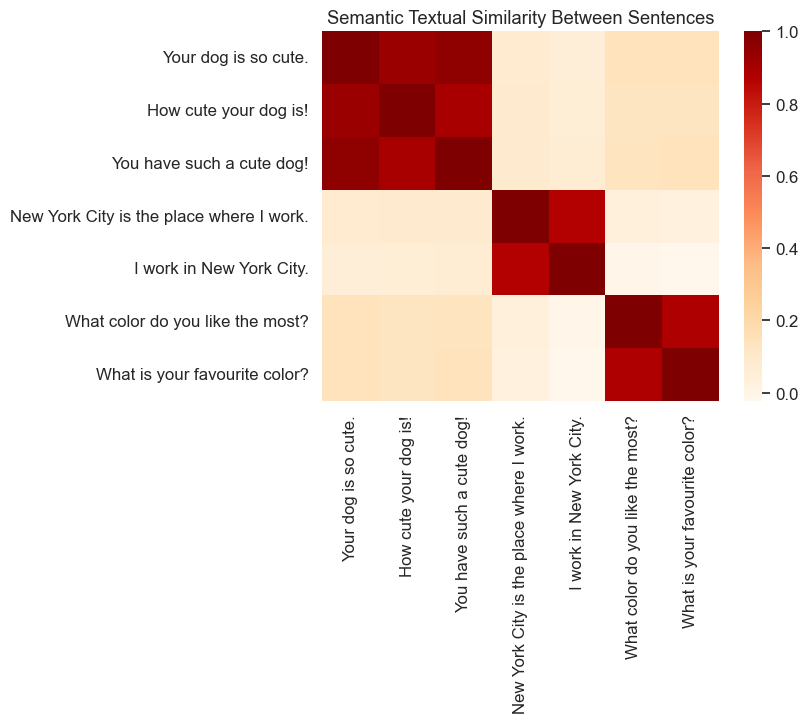

In [3]:
import sklearn
from sklearn.preprocessing import normalize
import numpy as np
import seaborn as sns


def plot_similarity_heatmap(text_labels, embeddings, rotation):
    """Takes sentences, embeddings and rotation as input and plot similarity heat map.

    Args:
      text_labels: a list of sentences to compute semantic textual similarity search.
      embeddings: a list of embedding vectors, each of which corresponds to a sentence.
      rotation: rotation used for display of the text_labels.
    """
    inner_product = np.inner(embeddings, embeddings)
    sns.set(font_scale=1.1)
    graph = sns.heatmap(
        inner_product,
        xticklabels=text_labels,
        yticklabels=text_labels,
        vmin=np.min(inner_product),
        vmax=1,
        cmap="OrRd",
    )
    graph.set_xticklabels(text_labels, rotation=rotation)
    graph.set_title("Semantic Textual Similarity Between Sentences")


sentences = [
    # Pets
    "Your dog is so cute.",
    "How cute your dog is!",
    "You have such a cute dog!",
    # Cities in the US
    "New York City is the place where I work.",
    "I work in New York City.",
    # Color
    "What color do you like the most?",
    "What is your favourite color?",
]

embeddings = []

for sentence in sentences:
    sentence = json.dumps({"inputText": sentence})
    query_response = get_embedding(body=sentence, modelId='amazon.titan-e1t-medium', accept='application/json', contentType='application/json')
    embeddings.append(query_response)
    
embeddings = normalize(np.array(embeddings), axis=1)  # normalization before inner product
plot_similarity_heatmap(sentences, embeddings, 90)

In [46]:
name = "Alice"
age = 25

# Skipping curly braces in f-string
print(f"Hello, {name}! {{age}} years old.")  # Output: Hello, Alice! {age} years old.


Hello, Alice! {age} years old.


In [55]:
import re
def add_skip_character_to_special_chars(text, skip_char):
    special_chars = r'([^a-zA-Z0-9\s])'  # Regular expression pattern for special characters
    return re.sub(special_chars, f'{skip_char}\\1', text)

# Example usage:
text = 'This is a "test" string! With special characters: $, %, @, #, etc.'
result = add_skip_character_to_special_chars(text, "\\")
print(result)

This is a \"test\" string\! With special characters\: \$\, \%\, \@\, \#\, etc\.


In [ ]:
import re
def add_skip_character_to_special_chars(text, skip_char):
    special_chars = r'([^a-zA-Z0-9\s])'  # Regular expression pattern for special characters
    return re.sub(special_chars, lambda match: f'{skip_char}{match.group(1)}', text)


# Example usage:
text = 'This is a "test" string! With special characters: $, %, @, #, etc.'
result = add_skip_character_to_special_chars(text, "\\")
print(result)

This is a \"test\" string\! With special characters\: \$\, \%\, \@\, \#\, etc\.


In [56]:
print("\,")

\,


In [68]:
input_message = "you are providing documentation and typing (type hints) of             code to be used in sphinx,            provide the typing imports in different code snippet, as an example for this request         ```python\\ def sum(a,b): if not isinstance(a, (int, float)) or not isinstance(b, (int, float)): raise TypeError("Both parameters must be numeric values.") return a+b ``` this is a proper response: ```python from typing import Union def sum(a: Union[int, float], b: Union[int, float]) -> Union[int, float]: \\"\\"\\" Returns the sum of two numbers. Args: a (int or float): The first number. b (int or float): The second number. Returns: int or float: The sum of `a` and `b`. Raises: TypeError: If `a` or `b` is not a numeric value. Examples: >>> sum(2, 3) 5 >>> sum(4.5, 2.5) 7.0 \\"\\"\\" if not isinstance(a, (int, float)) or not isinstance(b, (int, float)): raise TypeError("Both parameters must be numeric values.") return a + b provide sphinx docstring documentation and typehints for     def __init__(\n        self,\n        source_df: DataFrame,\n        spark_context: SparkSession,\n        config_path: str,\n        file_name: str,\n        src_system: str,\n    ) -> None:\n        """\n        Initializes the DataCheck class.\n\n        Args:\n            source_df (DataFrame): The source DataFrame to be checked.\n            spark_context (SparkSession): The SparkSession object.\n            config_path (str): The path to the configuration file.\n            file_name (str): The name of the file to be checked.\n            src_system (str): The source system identifier.\n\n        Attributes:\n            spark (SparkSession): The SparkSession object.\n            source_df (DataFrame): The source DataFrame to be checked.\n            error_df (DataFrame): The DataFrame containing errors.\n            error_columns (List[str]): The list of error columns.\n            error_counter (int): The error counter.\n            schema_dict (Dict[str, type]): The dictionary of schema types.\n            s3_client (boto3.client): The S3 client object.\n            s3_resource (boto3.resource): The S3 resource object.\n            config (Dict): The configuration dictionary.\n            rule_df (pd.DataFrame): The DataFrame containing data quality rules.\n            file_name (str): The name of the file to be checked.\n            input_columns (List[str]): The list of input columns.\n            output_columns (str): The output columns.\n            sns_message (List[str]): The list of SNS messages.\n        """\n        self.spark = spark_context\n        self.source_df = source_df\n        self.error_df = None\n        self.error_columns = []\n        self.error_counter = 0\n        self.schema_dict = {\n            "StringType": StringType,\n            "DateType": DateType,\n            "IntegerType": IntegerType,\n            "FloatType": FloatType,\n            "DoubleType": DoubleType,\n        }\n        self.s3_client = boto3.client("s3")\n        self.s3_resource = boto3.resource("s3")\n\n        # Initial configuration\n        config_content = self.read_s3_file(config_path).decode()\n        self.config = self.resolve_config(config_path.replace("config.json", "env.json"), json.loads(config_content))\n\n        dq_rule_path = self.config[src_system]["dq_rule_path"]\n        # dq_rule_content = self.read_s3_file(dq_rule_path)\n        self.rule_df = pd.read_csv(dq_rule_path, index_col="column_name")\n        self.file_name = file_name\n        self.rule_df = self.rule_df[(self.rule_df["file_name"] == self.file_name)]\n        self.rule_df = self.rule_df.applymap(lambda x: x or np.nan)\n        self.rule_df.sort_index(inplace=True)\n        self.sns_message = []\n\n        self.input_columns = self.source_df.columns\n        try:\n            self.output_columns = self.config[src_system]["sources"][self.file_name]["dq_output_columns"]\n        except Exception:\n            self.output_columns= \'Patient Number\'\n        for index in range(len(self.input_columns)):\n            if "." in self.input_columns[index]:\n                self.input_columns[index] = "`" + self.input_columns[index] + "`"\n\n        missed_columns = set(self.input_columns) - set(self.rule_df.index)\n        if len(missed_columns) > 0:\n            logger.warning(f"[{missed_columns}] are not found in the rule file.")\n\n        self.spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")\n        # self.spark.conf.set("spark.sql.legacy.timeParserPolicy", "CORRECTED")\n        self.spark.conf.set("spark.sql.adaptive.enabled", True)\n        self.spark.conf.set("spark.sql.adaptive.coalescePartitions.enabled", True)\n inDataCheckclass,                do not provide any other imports that are not used in typing and do not provide multiple options, just one code,                if it is a method in a class, do not provide any other code but the method itself and imports"

SyntaxError: invalid syntax (2259318219.py, line 1)

In [64]:
{
  "modelId": "anthropic.claude-v1",
  "contentType": "application/json",
  "accept": "*/*",
  "body": f"{{\"prompt\":\"Human: \\\ {input_message} \\\"\\n\\nAssistant:\",\"max_tokens_to_sample\":2048,\"temperature\":1,\"top_k\":250,\"top_p\":0.999,\"stop_sequences\":[],\"anthropic_version\":\"bedrock-2023-05-31\"}}"
}

'Human: you are providing documentation and typing (type hints) of             code to be used in sphinx,            provide the typing imports in different code snippet, as an example for this request         ```python\\ def sum(a,b): if not isinstance(a, (int, float)) or not isinstance(b, (int, float)): raise TypeError("Both parameters must be numeric values.") return a+b ``` this is a proper response: ```python from typing import Union def sum(a: Union[int, float], b: Union[int, float]) -> Union[int, float]: \\"\\"\\" Returns the sum of two numbers. Args: a (int or float): The first number. b (int or float): The second number. Returns: int or float: The sum of `a` and `b`. Raises: TypeError: If `a` or `b` is not a numeric value. Examples: >>> sum(2, 3) 5 >>> sum(4.5, 2.5) 7.0 \\"\\"\\" if not isinstance(a, (int, float)) or not isinstance(b, (int, float)): raise TypeError("Both parameters must be numeric values.") return a + b provide sphinx docstring documentation and typehints for 

In [67]:
body = json.dumps({"prompt": f"{{\"prompt\":\"Human: \\\ {input_message} \\\"\\n\\nAssistant:\",\"max_tokens_to_sample\":2048,\"temperature\":1,\"top_k\":250,\"top_p\":0.999,\"stop_sequences\":[],\"anthropic_version\":\"bedrock-2023-05-31\"}}"})
modelId = 'anthropic.claude-v1' # change this to use a different version from the model provider
accept = 'application/json'
contentType = 'application/json'
bedrock_api_output = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)

NameError: name 'input_message' is not defined